# 02 Experiments with scaling

In this document we continue our investigation of disjoint generative model. In paticular, we inspect the behaviour of the model when we do multiple splits beyond the original 2 splits. We compare to the efficiency of the original model and check the privacy and utility parameters under repeted rounds of experiments.

In [30]:
### Generate figures for the paper

import os
import time
import pandas as pd

from typing import Dict
from pandas import DataFrame

import matplotlib.pyplot as plt
rcp = {'font.size': 10, 'font.family': 'serif', "mathtext.fontset": "dejavuserif"}
plt.rcParams.update(**rcp)

from disjoint_generative_model import DisjointGenerativeModels

from disjoint_generative_model.utils.joining_strategies import JoinStrategy
from disjoint_generative_model.utils.generative_model_adapters import generate_synthetic_data

from syntheval import SynthEval

metrics = {
    "corr_diff" : {"mixed_corr": True},
    "auroc_diff" : {"model": "rf_cls"},
    "cls_acc"   : {"F1_type": "macro"},
    "eps_risk"  : {},
}

def data_for_time_privacy_and_utility_figure(
    model: str,
    num_repetitions: int,
    dgms_strategy: JoinStrategy,
    train_data: Dict[str, DataFrame],
    test_data: Dict[str, DataFrame],
    target_vars: Dict[str, str]) -> DataFrame:
    """ Generate a figure for training times and utility/privacy trade-off """

    steps = [2,3,4]

    results_df = pd.DataFrame(columns=['data','step','rep_idx','time','utility','privacy'])

    # do baselines first
    for data_name, data_df in train_data.items():
        syn_data = {}
        for i in range(num_repetitions):
            start = time.time()
            df_syn = generate_synthetic_data(data_df, model)
            end = time.time()

            syn_data[data_name+'0'+'r'+str(i)] = df_syn
            
            results_df.loc[len(results_df)] = {'data':data_name, 'step': 1, 'rep_idx':i,'time':end-start, 'utility':0,'privacy':0}
            
            for step in steps:
                start = time.time()
                dgms = DisjointGenerativeModels(data_df, step*[model], dgms_strategy)   
                df_dgms = dgms.fit_generate()
                end = time.time()

                syn_data[data_name+str(step)+'r'+str(i)] = df_dgms
                results_df.loc[len(results_df)] = {'data':data_name, 'step': step, 'rep_idx':i, 'time':end-start, 'utility':0,'privacy':0}

        SE = SynthEval(data_df, test_data[data_name], verbose=False)
        res, _ = SE.benchmark(syn_data, analysis_target_var=target_vars[data_name], **metrics, rank_strategy='summation')

        print(res['u_rank'].tolist())
        results_df.loc[results_df['data']==data_name, 'utility'] = res['u_rank'].tolist()
        results_df.loc[results_df['data']==data_name, 'privacy'] = res['p_rank'].tolist()

    return results_df

In [ ]:

df_bc = pd.read_csv('datasets/breast_cancer_train.csv')
df_bc_t = pd.read_csv('datasets/breast_cancer_test.csv')

df_cc = pd.read_csv('datasets/cervical_cancer_train.csv')
df_cc_t = pd.read_csv('datasets/cervical_cancer_test.csv')

train_data = {'bc':df_bc, 'cc':df_cc}
test_data = {'bc':df_bc_t, 'cc':df_cc_t}
target_vars = {'bc':'Status', 'cc':'Biopsy'}

res = data_for_time_privacy_and_utility_figure('synthpop', 3, None, train_data, test_data, target_vars)

Find out more at https://www.synthpop.org.uk/



Variable(s): Race, Marital.Status, T.Stage, N.Stage, Sixth.Stage, differentiate, A.Stage, Estrogen.Status, Progesterone.Status, Status have been changed for synthesis from character to factor.
Consider changing them to factors. You can do it using parameter 'minnumlevels'.
Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_0_synthpop.txt 


Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/


Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): Estrogen.Status, Status, A.Stage, Progesterone.Status numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): N.Stage, Race numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_1_synthpop.txt 
Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_0_synthpop.txt 


/home/lautrup/repositories/disjoint-synthetic-data-generation/disjoint_generative_model/utils/dataset_manager.py:35: UserWarning: Split sizes adjusted to {'split0': 6, 'split1': 5, 'split2': 5}
  warnings.warn(f"Split sizes adjusted to {split_sizes}")
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/


Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): A.Stage numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Consider changing them to factors. You can do it using parameter 'minnumlevels'.
Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): Estrogen.Status numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.


Variable(s): N.Stage, Race, Status, Progesterone.Status numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_2_synthpop.txt 
Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_1_synthpop.txt 
Synthet

Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/


Consider changing them to factors. You can do it using parameter 'minnumlevels'.
Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): Progesterone.Status numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.


Variable(s): A.Stage, Race, Status numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): N.Stage, Estrogen.Status numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_2_synthpop.txt 
Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_3_synthpop.txt 
Synthet

Find out more at https://www.synthpop.org.uk/



Variable(s): Race, Marital.Status, T.Stage, N.Stage, Sixth.Stage, differentiate, A.Stage, Estrogen.Status, Progesterone.Status, Status have been changed for synthesis from character to factor.
Consider changing them to factors. You can do it using parameter 'minnumlevels'.
Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_0_synthpop.txt 


Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/



Variable(s): Estrogen.Status, A.Stage, N.Stage, Race numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): Progesterone.Status, Status numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_0_synthpop.txt 
Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_1_synthpop.txt 


/home/lautrup/repositories/disjoint-synthetic-data-generation/disjoint_generative_model/utils/dataset_manager.py:35: UserWarning: Split sizes adjusted to {'split0': 6, 'split1': 5, 'split2': 5}
  warnings.warn(f"Split sizes adjusted to {split_sizes}")
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/


Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): N.Stage, Status numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.


Variable(s): Estrogen.Status numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): A.Stage, Progesterone.Status, Race numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_1_synthpop.txt 
Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_2_synthpop.txt 
Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home

Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/


Consider changing them to factors. You can do it using parameter 'minnumlevels'.
Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): Progesterone.Status, Estrogen.Status numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.


Variable(s): N.Stage numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): Status, Race numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): A.Stage numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_2_synthpop.txt 
Synthetic data e

Find out more at https://www.synthpop.org.uk/



Variable(s): Race, Marital.Status, T.Stage, N.Stage, Sixth.Stage, differentiate, A.Stage, Estrogen.Status, Progesterone.Status, Status have been changed for synthesis from character to factor.
Consider changing them to factors. You can do it using parameter 'minnumlevels'.
Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_0_synthpop.txt 


Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/


Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): A.Stage, Race, Progesterone.Status, Estrogen.Status numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): N.Stage, Status numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_0_synthpop.txt 
Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_1_synthpop.txt 


/home/lautrup/repositories/disjoint-synthetic-data-generation/disjoint_generative_model/utils/dataset_manager.py:35: UserWarning: Split sizes adjusted to {'split0': 6, 'split1': 5, 'split2': 5}
  warnings.warn(f"Split sizes adjusted to {split_sizes}")
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/


Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): A.Stage numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): N.Stage, Estrogen.Status, Race numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): Status, Progesterone.Status numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_1_synthpop.txt 
Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_2_synthpop.txt 
Synthet

Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/


Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): A.Stage numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): Estrogen.Status numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): N.Stage, Race numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_2_synthpop.txt 
Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_0_synthpop.txt 
Consider changing them to factors. Y

/tmp/ipykernel_1173930/4135256040.py:63: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.978336315208332, 3.42063672558794, 3.385757079056603, 3.2180537601799055, 3.9492904329051086, 3.4658276225084936, 3.9325579275925886, 3.392312779225989, 3.9695635349976053, 3.4113272547996845, 3.3254956382627734, 3.273027834564508]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results_df.loc[results_df['data']==data_name, 'utility'] = res['u_rank'].tolist()
/tmp/ipykernel_1173930/4135256040.py:64: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.1174496644295302, 1.6610738255033557, 1.8210290827740492, 1.8333333333333335, 1.1524981357196122, 1.4843400447427293, 1.8586875466070096, 1.8765846383296048, 1.1196868008948546, 1.5712155108128263, 1.6677852348993287, 1.8501118568232662]' has dtype i

Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): Smokes, Hormonal.Contraceptives, IUD, STDs, STDs.condylomatosis, STDs.cervical.condylomatosis, STDs.vaginal.condylomatosis, STDs.vulvo.perineal.condylomatosis, STDs.syphilis, STDs.pelvic.inflammatory.disease, STDs.genital.herpes, STDs.molluscum.contagiosum, STDs.AIDS, STDs.HIV, STDs.Hepatitis.B, STDs.HPV, STDs..Number.of.diagnosis, Dx.Cancer, Dx.CIN, Dx.HPV, Dx, Hinselmann, Schiller, Citology, Biopsy numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_0_synthpop.txt 


Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/



Variable(s): STDs.cervical.condylomatosis, STDs.HPV, STDs.vaginal.condylomatosis, STDs.pelvic.inflammatory.disease, STDs.Hepatitis.B, STDs..Number.of.diagnosis, STDs.genital.herpes, Biopsy, STDs.HIV, Dx.HPV, Hinselmann, IUD, STDs, STDs.vulvo.perineal.condylomatosis numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): Citology, Dx.Cancer, STDs.AIDS, Smokes, STDs.condylomatosis, Dx, Schiller, STDs.syphilis, STDs.molluscum.contagiosum, Dx.CIN, Hormonal.Contraceptives numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_0_synthpop.txt 
Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synth

/home/lautrup/repositories/disjoint-synthetic-data-generation/disjoint_generative_model/utils/dataset_manager.py:35: UserWarning: Split sizes adjusted to {'split0': 12, 'split1': 11, 'split2': 11}
  warnings.warn(f"Split sizes adjusted to {split_sizes}")
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/



Variable(s): STDs.AIDS, STDs.molluscum.contagiosum, STDs..Number.of.diagnosis, Dx.Cancer, IUD, STDs.condylomatosis, Biopsy numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): STDs.vulvo.perineal.condylomatosis, Hormonal.Contraceptives, STDs.Hepatitis.B, STDs.pelvic.inflammatory.disease, STDs.HIV, Citology, Hinselmann, STDs.cervical.condylomatosis, Smokes numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.


Variable(s): STDs.syphilis, Dx.CIN, STDs.genital.herpes, Schiller, STDs, Dx.HPV, STDs.vaginal.condylomatosis, STDs.HPV, Dx numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_1_synthpop.txt 
Synthetic data exported 

/home/lautrup/repositories/disjoint-synthetic-data-generation/disjoint_generative_model/utils/dataset_manager.py:35: UserWarning: Split sizes adjusted to {'split0': 10, 'split1': 8, 'split2': 8, 'split3': 8}
  warnings.warn(f"Split sizes adjusted to {split_sizes}")
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/


Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): Smokes, STDs.Hepatitis.B, Dx.CIN, STDs.vulvo.perineal.condylomatosis, Dx.Cancer, STDs.genital.herpes numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.


Variable(s): Dx.HPV, STDs, STDs.cervical.condylomatosis, STDs.AIDS, STDs.vaginal.condylomatosis, STDs.syphilis, STDs.pelvic.inflammatory.disease, Dx numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.


Variable(s): Hinselmann, STDs.HPV, Citology, Hormonal.Contraceptives, IUD numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_1_synthpop.txt 

Variable(s): STDs..Number.of.diagnosis, STDs.condylomatosis, Biopsy, Schiller, STDs.molluscum.contagiosum, STDs.HIV numeric but

Find out more at https://www.synthpop.org.uk/


Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): Smokes, Hormonal.Contraceptives, IUD, STDs, STDs.condylomatosis, STDs.cervical.condylomatosis, STDs.vaginal.condylomatosis, STDs.vulvo.perineal.condylomatosis, STDs.syphilis, STDs.pelvic.inflammatory.disease, STDs.genital.herpes, STDs.molluscum.contagiosum, STDs.AIDS, STDs.HIV, STDs.Hepatitis.B, STDs.HPV, STDs..Number.of.diagnosis, Dx.Cancer, Dx.CIN, Dx.HPV, Dx, Hinselmann, Schiller, Citology, Biopsy numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_0_synthpop.txt 


Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/



Variable(s): STDs.molluscum.contagiosum, Hormonal.Contraceptives, Biopsy, Dx, STDs.syphilis, Smokes, STDs.vulvo.perineal.condylomatosis, STDs.condylomatosis, STDs.HPV, STDs.AIDS, Schiller, STDs.genital.herpes, Citology numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): IUD, STDs.HIV, Dx.HPV, STDs.cervical.condylomatosis, STDs, STDs.pelvic.inflammatory.disease, STDs.Hepatitis.B, Dx.CIN, Dx.Cancer, STDs..Number.of.diagnosis, Hinselmann, STDs.vaginal.condylomatosis numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_0_synthpop.txt 
Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synth

/home/lautrup/repositories/disjoint-synthetic-data-generation/disjoint_generative_model/utils/dataset_manager.py:35: UserWarning: Split sizes adjusted to {'split0': 12, 'split1': 11, 'split2': 11}
  warnings.warn(f"Split sizes adjusted to {split_sizes}")
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/



Variable(s): STDs.cervical.condylomatosis, Hinselmann, STDs.molluscum.contagiosum, Dx.Cancer, STDs.Hepatitis.B, Hormonal.Contraceptives, STDs..Number.of.diagnosis, STDs.vaginal.condylomatosis numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): Schiller, Citology, Dx.HPV, Smokes, Biopsy, STDs.AIDS, Dx, STDs.syphilis, STDs.pelvic.inflammatory.disease numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.


Variable(s): IUD, STDs.HPV, STDs.vulvo.perineal.condylomatosis, STDs.HIV, STDs.genital.herpes, STDs.condylomatosis, STDs, Dx.CIN numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_2_synthpop.txt 
Synthetic data exported 

/home/lautrup/repositories/disjoint-synthetic-data-generation/disjoint_generative_model/utils/dataset_manager.py:35: UserWarning: Split sizes adjusted to {'split0': 10, 'split1': 8, 'split2': 8, 'split3': 8}
  warnings.warn(f"Split sizes adjusted to {split_sizes}")
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/


Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): Dx, STDs.cervical.condylomatosis, Biopsy, Schiller, STDs..Number.of.diagnosis, Dx.HPV, Smokes, STDs.pelvic.inflammatory.disease numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.


Variable(s): Hinselmann, STDs.HPV, STDs.AIDS, STDs.Hepatitis.B, STDs.genital.herpes numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.


Variable(s): STDs.HIV, STDs, STDs.condylomatosis, STDs.vulvo.perineal.condylomatosis, Dx.Cancer, Citology, IUD, STDs.vaginal.condylomatosis numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_3_synthpop.txt 
Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/rep

Find out more at https://www.synthpop.org.uk/


Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_2_synthpop.txt 


Find out more at https://www.synthpop.org.uk/


Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): Smokes, Hormonal.Contraceptives, IUD, STDs, STDs.condylomatosis, STDs.cervical.condylomatosis, STDs.vaginal.condylomatosis, STDs.vulvo.perineal.condylomatosis, STDs.syphilis, STDs.pelvic.inflammatory.disease, STDs.genital.herpes, STDs.molluscum.contagiosum, STDs.AIDS, STDs.HIV, STDs.Hepatitis.B, STDs.HPV, STDs..Number.of.diagnosis, Dx.Cancer, Dx.CIN, Dx.HPV, Dx, Hinselmann, Schiller, Citology, Biopsy numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_0_synthpop.txt 


Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/


Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): STDs.molluscum.contagiosum, STDs.condylomatosis, STDs.HIV, STDs.pelvic.inflammatory.disease, Dx.HPV, STDs..Number.of.diagnosis, Smokes, Citology, STDs.Hepatitis.B, IUD, Hinselmann, STDs.vulvo.perineal.condylomatosis, Dx numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.


Variable(s): Dx.Cancer, Biopsy, Schiller, STDs.cervical.condylomatosis, STDs.syphilis, Hormonal.Contraceptives, STDs.genital.herpes, STDs, STDs.AIDS, Dx.CIN, STDs.vaginal.condylomatosis, STDs.HPV numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_0_synthpop.txt 
Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synth

/home/lautrup/repositories/disjoint-synthetic-data-generation/disjoint_generative_model/utils/dataset_manager.py:35: UserWarning: Split sizes adjusted to {'split0': 12, 'split1': 11, 'split2': 11}
  warnings.warn(f"Split sizes adjusted to {split_sizes}")
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/



Variable(s): Hinselmann, STDs.condylomatosis, IUD, STDs.pelvic.inflammatory.disease, Smokes, Dx.CIN, STDs.vulvo.perineal.condylomatosis, STDs.HIV, STDs.AIDS numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.


Variable(s): Schiller, STDs.vaginal.condylomatosis, STDs.syphilis, STDs.genital.herpes, Citology, Hormonal.Contraceptives, Dx, STDs.cervical.condylomatosis, Dx.Cancer numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): STDs.Hepatitis.B, STDs.HPV, Biopsy, STDs..Number.of.diagnosis, Dx.HPV, STDs.molluscum.contagiosum, STDs numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_0_synthpop.txt 
Synthetic data exported 

/home/lautrup/repositories/disjoint-synthetic-data-generation/disjoint_generative_model/utils/dataset_manager.py:35: UserWarning: Split sizes adjusted to {'split0': 10, 'split1': 8, 'split2': 8, 'split3': 8}
  warnings.warn(f"Split sizes adjusted to {split_sizes}")
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/
Find out more at https://www.synthpop.org.uk/



Variable(s): STDs.pelvic.inflammatory.disease, STDs.cervical.condylomatosis, STDs.HIV, Dx.CIN, STDs.condylomatosis, Dx numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Consider changing them to factors. You can do it using parameter 'minnumlevels'.

Variable(s): Hinselmann, STDs.syphilis, STDs.genital.herpes, STDs.vaginal.condylomatosis, STDs.AIDS, Citology, Dx.Cancer numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.


Variable(s): Dx.HPV, IUD, STDs.Hepatitis.B, STDs.molluscum.contagiosum, Hormonal.Contraceptives numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_3_synthpop.txt 
Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-

Find out more at https://www.synthpop.org.uk/



Variable(s): STDs.vulvo.perineal.condylomatosis, STDs.HPV, STDs, Smokes, Biopsy, STDs..Number.of.diagnosis, Schiller numeric but with only 3 or fewer distinct values turned into factor(s) for synthesis.

Synthetic data exported as csv file(s).
Information on synthetic data written to
  /home/lautrup/repositories/disjoint-synthetic-data-generation/synthesis_info_synthpop_temp_0_synthpop.txt 
[3.854967363452894, 3.35352403773629, 3.06748314366435, 3.860719509359166, 3.9475667699101447, 3.8602010194720617, 3.889249864595529, 3.846567183283204, 3.8621642902013824, 3.7778189409931793, 3.0217932675188965, 3.834279215293297]


In [44]:
### calculate mean and std for each step
res_mean = res.groupby(['data','step'])
res_mean = res_mean.agg({'time':['mean', 'std'], 'utility':['mean', 'std'], 'privacy':['mean', 'std']}).reset_index()

res_mean.columns = ['_'.join(col) for col in res_mean.columns.values]

res_mean

,data_,step_,time_mean,time_std,utility_mean,utility_std,privacy_mean,privacy_std
0,bc,1,4.110818,0.091318,3.965730,0.014898,1.129878,0.019621
1,bc,2,3.837085,0.765644,3.432597,0.029152,1.572210,0.088371
2,bc,3,3.345661,0.061733,3.547937,0.334452,1.782501,0.101115
3,bc,4,3.279078,0.028367,3.294465,0.089085,1.853343,0.021806
4,cc,1,3.038263,0.088778,3.888233,0.051511,1.148315,0.024307
5,cc,2,3.256356,0.087437,3.663848,0.271887,1.363296,0.103232
6,cc,3,3.210241,0.055869,3.326175,0.488172,1.451685,0.042697
7,cc,4,3.313619,0.171412,3.847189,0.013231,1.361049,0.079334


/home/lautrup/sdg_env/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lautrup/sdg_env/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


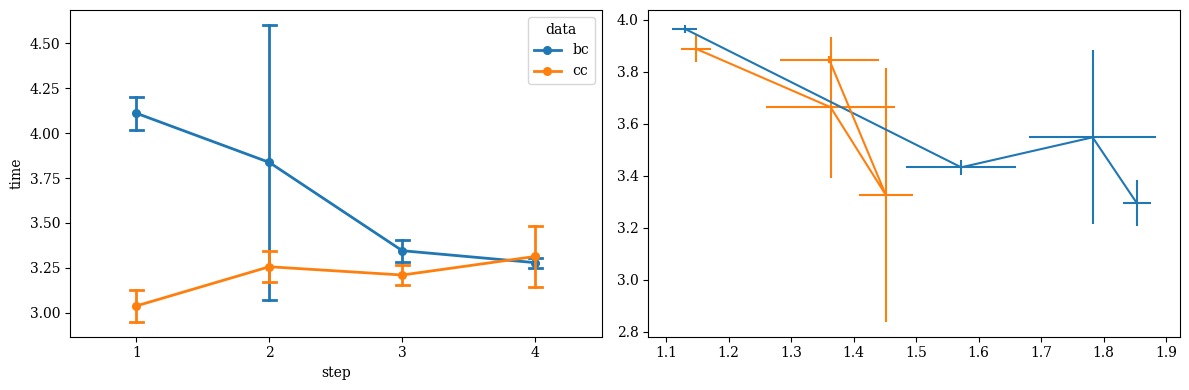

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
rcp = {'font.size': 10, 'font.family': 'serif', "mathtext.fontset": "dejavuserif"}
plt.rcParams.update(**rcp)

def time_privacy_and_utility_figure(res_mean):

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    ax_time = ax[0]

    sns.pointplot(data=res, x="step", y="time", hue="data", ax=ax_time, palette='tab10', capsize=.1, linewidth=2, errorbar='sd')

    # sns.regplot(data=res, x="privacy", y="utility", hue="data", ax=ax[1], ci=None, scatter_kws={'s': 100})
    # sns.lmplot(data=res, x="privacy", y="utility", hue="data", ax=ax[1], palette='tab10', ci=None)
    # sns.pointplot(data=res, x="privacy", y="utility", hue="data", ax=ax[1], palette='tab10', capsize=.1, linewidth=2, errorbar='sd')


    ax[1].errorbar(res_mean[res_mean['data_']=='bc']['privacy_mean'], 
                   res_mean[res_mean['data_']=='bc']['utility_mean'], 
                   xerr=res_mean[res_mean['data_']=='bc']['privacy_std'], 
                   yerr=res_mean[res_mean['data_']=='bc']['utility_std'], label='bc')
    ax[1].errorbar(res_mean[res_mean['data_']=='cc']['privacy_mean'], 
                   res_mean[res_mean['data_']=='cc']['utility_mean'], 
                   xerr=res_mean[res_mean['data_']=='cc']['privacy_std'], 
                   yerr=res_mean[res_mean['data_']=='cc']['utility_std'], label='cc')



    # for i, data in enumerate(['bc', 'cc']):
    #     data_res = res_mean[res_mean['data']==data]
    #     ax[i].errorbar(data_res['step'], data_res['time']['mean'], yerr=data_res['time']['std'], label='Time')
    #     ax[i].errorbar(data_res['step'], data_res['utility']['mean'], yerr=data_res['utility']['std'], label='Utility')
    #     ax[i].errorbar(data_res['step'], data_res['privacy']['mean'], yerr=data_res['privacy']['std'], label='Privacy')
    #     ax[i].set_title(data)
    #     ax[i].set_xlabel('Step')
    #     ax[i].set_ylabel('Time/Utility/Privacy')
    #     ax[i].legend()

    plt.tight_layout()
    plt.show()

time_privacy_and_utility_figure(res_mean)